In [62]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [63]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.environ["langchain_api_key"]

In [13]:
# pip list

Package                                 Version
--------------------------------------- -------------
aiohappyeyeballs                        2.4.4
aiohttp                                 3.11.11
aiosignal                               1.3.2
annotated-types                         0.7.0
anyio                                   4.8.0
asttokens                               3.0.0
attrs                                   24.3.0
beautifulsoup4                          4.12.3
cachetools                              5.5.0
certifi                                 2024.12.14
cffi                                    1.17.1
charset-normalizer                      3.4.1
chromedriver-autoinstaller              0.6.4
click                                   8.1.8
colorama                                0.4.6
comm                                    0.2.2
cssselect                               1.2.0
dataclasses-json                        0.6.7
debugpy                                 1.8.11
decorator    

In [64]:
from langchain_community.vectorstores.faiss import FAISS

In [65]:
from langchain_community.vectorstores import weaviate

In [66]:
import weaviate

In [67]:

WEAVIATE_URL = os.getenv('WEAVIATE_CLUSTER')
WEAVIATE_API_KEY = os.getenv('WEAVIATE_API_KEY')

In [68]:
from weaviate.classes.init import Auth

In [69]:

client = weaviate.connect_to_weaviate_cloud(
    cluster_url=WEAVIATE_URL,                                    # Replace with your Weaviate Cloud URL
    auth_credentials=Auth.api_key(WEAVIATE_API_KEY),             # Replace with your Weaviate Cloud key
)

In [89]:
client

In [70]:
print(client.is_ready()) 

True


In [71]:

# specify embedding model (using huggingface sentence transformer)
from langchain.embeddings import HuggingFaceEmbeddings
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
#model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  #model_kwargs=model_kwargs
)

In [90]:
embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-mpnet-base-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [72]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("theory/rag.pdf", extract_images=True)
pages = loader.load()

In [91]:
loader

In [27]:
pages

[Document(metadata={'source': 'theory/rag.pdf', 'page': 0}, page_content='A first intro to Complex RAG (Retrieval\nAugmented Generation)\nChia Jeng Yang · Follow\nPublished inWhyHow.AI\n11 min read · Dec 14, 2023\nListen Share More\nIf you’re looking for a non-technical introduction to RAG, including answers to\nvarious getting-started questions and a discussion of relevant use-cases, check out\nour breakdown of RAG here.\nIn this article, we discuss various technical considerations when implementing\nRAG, exploring the concepts of chunking, query augmentation, hierarchies, multi-\nhop reasoning, and knowledge graphs. We also discuss unsolved problems &\nopportunities in the RAG infrastructure space, and introduce some infrastructure\nsolutions for building RAG pipelines.\nThe first obstacles and design choices you will be making when building a RAG\nsystem are in how to prepare the documents for storage and information extraction.\nThat will be the primary focus of this article.\nAs a

In [73]:
# Split text into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20) # create chunk
docs = text_splitter.split_documents(pages)

In [92]:
text_splitter

In [29]:
docs

[Document(metadata={'source': 'theory/rag.pdf', 'page': 0}, page_content='A first intro to Complex RAG (Retrieval\nAugmented Generation)\nChia Jeng Yang · Follow\nPublished inWhyHow.AI\n11 min read · Dec 14, 2023\nListen Share More\nIf you’re looking for a non-technical introduction to RAG, including answers to\nvarious getting-started questions and a discussion of relevant use-cases, check out\nour breakdown of RAG here.\nIn this article, we discuss various technical considerations when implementing\nRAG, exploring the concepts of chunking, query augmentation, hierarchies, multi-\nhop reasoning, and knowledge graphs. We also discuss unsolved problems &\nopportunities in the RAG infrastructure space, and introduce some infrastructure\nsolutions for building RAG pipelines.\nThe first obstacles and design choices you will be making when building a RAG\nsystem are in how to prepare the documents for storage and information extraction.\nThat will be the primary focus of this article.\nAs a

In [74]:
from langchain_community.vectorstores import Weaviate

In [75]:

from langchain_weaviate.vectorstores import WeaviateVectorStore

The WeaviateVectorStore class is used to create a vector database that can be used for semantic search, question answering, and other information retrieval tasks.

In [76]:
vector_db = WeaviateVectorStore.from_documents(
    docs, embeddings, client=client, by_text=False
)

In [35]:
col_configs = client.collections.list_all()

In [36]:
col_configs

{'Mistralcoll': _CollectionConfigSimple(name='Mistralcoll', description=None, generative_config=None, properties=[], references=[], reranker_config=None, vectorizer_config=None, vectorizer=<Vectorizers.NONE: 'none'>, vector_config=None)}

In [77]:
collection = client.collections.get("Mistralcoll")
config = collection.config.get()

print(config)

_CollectionConfig(name='Mistralcoll', description=None, generative_config=None, inverted_index_config=_InvertedIndexConfig(bm25=_BM25Config(b=0.75, k1=1.2), cleanup_interval_seconds=60, index_null_state=False, index_property_length=False, index_timestamps=False, stopwords=_StopwordsConfig(preset=<StopwordsPreset.EN: 'en'>, additions=None, removals=None)), multi_tenancy_config=_MultiTenancyConfig(enabled=False, auto_tenant_creation=False, auto_tenant_activation=False), properties=[], references=[], replication_config=_ReplicationConfig(factor=1, async_enabled=False, deletion_strategy=<ReplicationDeletionStrategy.NO_AUTOMATED_RESOLUTION: 'NoAutomatedResolution'>), reranker_config=None, sharding_config=_ShardingConfig(virtual_per_physical=128, desired_count=1, actual_count=1, desired_virtual_count=128, actual_virtual_count=128, key='_id', strategy='hash', function='murmur3'), vector_index_config=_VectorIndexConfigHNSW(quantizer=None, cleanup_interval_seconds=300, distance_metric=<VectorDi

In [42]:

print(vector_db.similarity_search("what is rag?", k=3)[0].page_content)

Source: https://www.youtube.com/watch?v=TRjq7t2Ms5I&ab_channel=AIEngineer
Technical Implementation of RAG
Chunking Strategy
In the context of natural language processing, “chunking” refers to the
segmentation of text into small, concise, meaningful ‘chunks.’ A RAG system can
more quickly and accurately locate relevant context in smaller text chunks than in
large documents.
How can you ensure you’re selecting the right chunk? The effectiveness of your
chunking strategy largely depends on the quality and structure of these chunks.
Determining the optimal chunk size is about striking a balance — capturing all
essential information without sacrificing speed.
While larger chunks can capture more context, they introduce more noise and
require more time and compute costs to process. Smaller chunks have less noise,
but may not fully capture the necessary context. Overlapping chunks is a way to
balance both of these constraints. By overlapping chunks, a query will likely retrieve


In [43]:
print(vector_db.similarity_search("what is rag?", k=3)[1].page_content)

knowledge representation, such as advanced encoding techniques for complex data
relationships and innovative storage solutions. These developments will enable RAG
systems to effectively manage and utilize growing data complexities.
Challenges in RAG Development
1/8/25, 3:05 PM A first intro to Complex RAG (Retrieval Augmented Generation) | by Chia Jeng Yang | WhyHow.AI | Medium
https://medium.com/enterprise-rag/a-first-intro-to-complex-rag-retrieval-augmented-generation-a8624d70090f 11/21structureldata/contextabout
such ascholnesterasenbitors'andnenantie
Alzhemer'streatments
Knowledge sropi of latent kncwledge
Initial Query
Augmentecl
Response
what are the current
treatments anlside-effects
Recent researek have Skewm XY2.
for Alzheiner's disease?
Should be asare of the lited lxical tria!data out there
Itisportant that anyone consideringxY2
Augrented
VectorDatabase
Gvery
Iaitial Constructed
Query  Retrieval
Resporse
what s the latest research on
Coestrurtel Reyoete


k: The number of results to return, in this case, 3.
Retrieving Page Content:
The code snippet you provided attempts to retrieve the page_content attribute from the third result (index 2) of the similarity search.

In [44]:
print(vector_db.similarity_search("what is rag?", k=3)[2].page_content)

disease treatment?” A RAG system leveraging the aforementioned strategies would
then employ the following steps:
Query Planning:
“What are the current treatments and side-effects for Alzheimer’s disease?”
“What is the latest research on these treatments?”
Query Augmentation:
“What is the latest research on these treatments?” With access to a knowledge
graph, the agent can consistently retrieve structured data about Alzheimer’s
treatments, such as “cholinesterase inhibitors” and “memantine.”
The RAG system would then refine the question into “What is the latest research
on cholinesterase inhibitors and memantine in Alzheimer’s disease treatment?”
Document Hierarchies and Vector Database retrieval:
Using a document hierarchy, identify which documents and chunks are the most
relevant to “cholinesterase inhibitors” and “memantine” and return the relevant
answer.
You may also have an LLM include these chunks into the knowledge graph of


In [47]:

print(
    vector_db.similarity_search(
        "what is attention?", k=3)
    )

[Document(metadata={'page': 8.0, 'source': 'theory/rag.pdf'}, page_content='augmentation.\nLet us deconstruct with an example from the medical field. In this article, Wisecube\nproposes the following question: “What are the latest advancements in Alzheimer’s\n1/8/25, 3:05 PM A first intro to Complex RAG (Retrieval Augmented Generation) | by Chia Jeng Yang | WhyHow.AI | Medium\nhttps://medium.com/enterprise-rag/a-first-intro-to-complex-rag-retrieval-augmented-generation-a8624d70090f 9/21'), Document(metadata={'page': 9.0, 'source': 'theory/rag.pdf'}, page_content='disease treatment?” A RAG system leveraging the aforementioned strategies would\nthen employ the following steps:\nQuery Planning:\n“What are the current treatments and side-effects for Alzheimer’s disease?”\n“What is the latest research on these treatments?”\nQuery Augmentation:\n“What is the latest research on these treatments?” With access to a knowledge\ngraph, the agent can consistently retrieve structured data about Alzh

In [78]:
from langchain.prompts import ChatPromptTemplate

template="""You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""

In [ ]:
# The template consists of:
# Introduction: "You are an assistant for question-answering tasks."
# Instructions: Use the provided context to answer the question, and admit if you don't know the answer.
# Constraints: Keep the answer concise and within 10 sentences.
# Placeholder for Question: "{question}"
# Placeholder for Context: "{context}"
# Answer Prefix: "Answer:"

In [79]:
prompt=ChatPromptTemplate.from_template(template)

In [80]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks.\nUse the following pieces of retrieved context to answer the question.\nIf you don't know the answer, just say that you don't know.\nUse ten sentences maximum and keep the answer concise.\nQuestion: {question}\nContext: {context}\nAnswer:\n"), additional_kwargs={})])

In [81]:

from langchain import HuggingFaceHub

In [82]:
import os
from dotenv  import load_dotenv
load_dotenv()

True

In [83]:

model = HuggingFaceHub(
    huggingfacehub_api_token=os.getenv('HUGGINGFACE_TOKEN'),
    repo_id="mistralai/Mistral-7B-Instruct-v0.1",
    model_kwargs={"temperature":1, "max_length":180}  # temperature: 1, which controls the randomness of the model's output.
)

In [84]:

from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

In [85]:

output_parser=StrOutputParser() # StrOutputParser class is a simple output parser that treats the model's output as a string.

In [95]:
output_parser

StrOutputParser()

In [86]:
retriever=vector_db.as_retriever() # The as_retriever() method converts the vector DB into a retriever object, which can 
# be used to retrieve relevant documents or information from the database based on a given query.

In [93]:
retriever

VectorStoreRetriever(tags=['WeaviateVectorStore', 'HuggingFaceEmbeddings'], vectorstore=<langchain_weaviate.vectorstores.WeaviateVectorStore object at 0x000001BE58116750>, search_kwargs={})

In [87]:
rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | model
    | output_parser
)

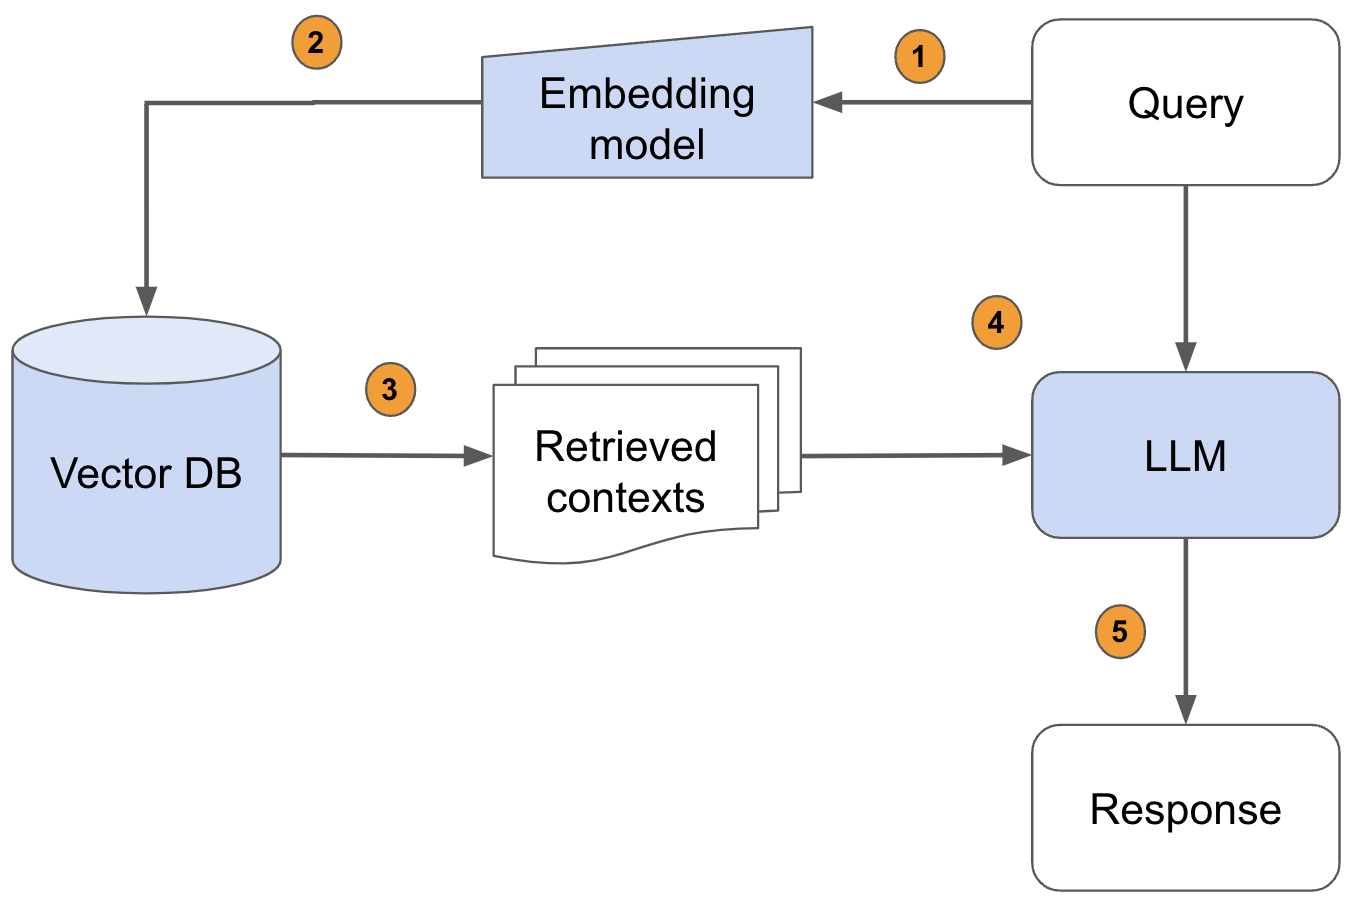

In [94]:
rag_chain # made of retriver and llm , query is givent ot both of them

{
  context: VectorStoreRetriever(tags=['WeaviateVectorStore', 'HuggingFaceEmbeddings'], vectorstore=<langchain_weaviate.vectorstores.WeaviateVectorStore object at 0x000001BE58116750>, search_kwargs={}),
  question: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks.\nUse the following pieces of retrieved context to answer the question.\nIf you don't know the answer, just say that you don't know.\nUse ten sentences maximum and keep the answer concise.\nQuestion: {question}\nContext: {context}\nAnswer:\n"), additional_kwargs={})])
| HuggingFaceHub(client=<InferenceClient(model='mistralai/Mistral-7B-Instruct-v0.1', timeout=None)>, repo_id='mistralai/Mistral-7B-Instruct-v0.1', task='text-generation', model_kwargs={'tempera

In [ ]:
# ou're creating a RAG (Retrieve, Ask, Generate) chain using the LangChain library.
# RAG Chain:
# The RAG chain is a pipeline that combines multiple components to perform a specific task. In this case, the chain consists of:
# Retriever: Retrieves relevant context from a database or knowledge graph.
# Question: A passthrough component that doesn't modify the input.
# Prompt: A component that generates a prompt based on the input.
# Model: A language model that generates text based on the prompt.
# Output Parser: A component that parses the output of the model.
# Chain Syntax:
# The chain is defined using the | operator, which represents the flow of data between components. Each component is represented by a dictionary or an object that implements the required interface.

In [88]:
print(rag_chain.invoke("what is rag ?"))

KeyboardInterrupt: 